# Saint Eynard - CampusIoT

Author: Didier DONSEZ

This notebook processes messages sent by LoRaWAN endpoints deployed at Fort du Saint Eynard.

More information: https://github.com/CampusIoT/datasets/tree/main/SaintEynard 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [2]:
df1 = pd.read_json('../logs/d1d1e80000000033_campusiot.ndjson.gz', lines=True)
df2 = pd.read_json('../logs/d1d1e80000000033_campusiot-2.ndjson.gz', lines=True)

In [3]:
frames = pd.concat([df1, df2], ignore_index=True, sort=True)

In [4]:
frames['_dt']=pd.to_datetime(frames['_timestamp'],unit='ms')

> NDJSON files contains 4 types of entries : join, rx, status, error
> They should be processed separally

## Status

> margin is the link margin

In [5]:
status = frames.loc[frames['_topic'].str.endswith('/status')]
status = status[['deviceName', 'devEUI', '_dt', '_timestamp', '_date', 'margin', 'externalPowerSource', 'batteryLevel', 'batteryLevelUnavailable']]
status

,deviceName,devEUI,_dt,_timestamp,_date,margin,externalPowerSource,batteryLevel,batteryLevelUnavailable
8,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 11:22:49.164,1687519369164,2023-06-23T11:22:49.164Z,-6.0,0.0,0.0,1.0
33,WYRES_33_SAINTEYNARD,d1d1e80000000033,2023-06-23 15:25:07.758,1687533907758,2023-06-23T15:25:07.758Z,16.0,0.0,0.0,1.0
58,WYRES_33_SAINTEYNARD,d1d1e80000000033,2023-06-23 19:26:43.363,1687548403363,2023-06-23T19:26:43.363Z,5.0,0.0,0.0,1.0
131,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-24 07:31:29.948,1687591889948,2023-06-24T07:31:29.948Z,-5.0,0.0,0.0,1.0
180,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-24 15:34:42.147,1687620882147,2023-06-24T15:34:42.147Z,19.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14073,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-09-27 09:11:59.732,1695805919732,2023-09-27T09:11:59.732Z,24.0,0.0,0.0,1.0
14098,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-09-27 13:13:34.701,1695820414701,2023-09-27T13:13:34.701Z,20.0,0.0,0.0,1.0
14122,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-09-27 17:15:12.262,1695834912262,2023-09-27T17:15:12.262Z,12.0,0.0,0.0,1.0
14147,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-09-27 21:16:50.059,1695849410059,2023-09-27T21:16:50.059Z,20.0,0.0,0.0,1.0


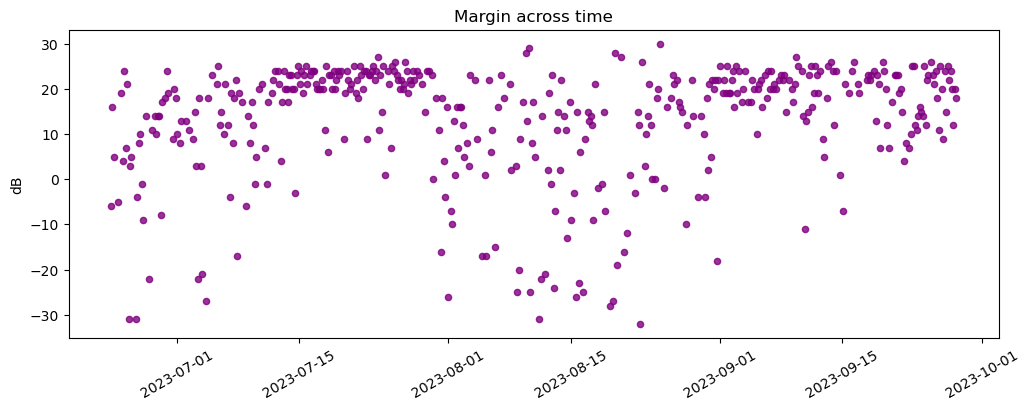

In [6]:
status.plot(x='_dt', y='margin', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        title='Margin across time', xlabel='', ylabel='dB', fontsize=10, figsize=(12,4));
#         legend=None, 
plt.show()

## Activation (OTAA)

In [8]:
join = frames.loc[frames['_topic'].str.endswith('/join')]
join

,_date,_redundancy,_timestamp,_topic,adr,batteryLevel,batteryLevelUnavailable,data,devEUI,deviceName,externalPowerSource,fCnt,fPort,margin,object,rxInfo,txInfo,_dt


## RX

In [9]:
rx = frames.loc[frames['_topic'].str.endswith('/rx')].drop(\
            ['margin', 'externalPowerSource', 'batteryLevel', 'batteryLevelUnavailable'], axis=1)
rx['_dt']=pd.to_datetime(rx['_timestamp'],unit='ms')
rx

,_date,_redundancy,_timestamp,_topic,adr,data,devEUI,deviceName,fCnt,fPort,object,rxInfo,txInfo,_dt
0,2023-06-23T10:01:57.004Z,7.0,1687514517004,application/rx,1.0,502b0c04c49a0a000f0400fb3f040601ea0702a90d0302...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1151.0,3.0,"{'data': {'battery': {'data': 3.497}, 'dlId': ...",[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 868500000, 'dr': 5}",2023-06-23 10:01:57.004
1,2023-06-23T10:11:59.135Z,8.0,1687515119135,application/rx,1.0,50240c041f9d0a000f0400033d0103029f0a0404dc5601...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1152.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867100000, 'dr': 5}",2023-06-23 10:11:59.135
2,2023-06-23T10:22:03.213Z,8.0,1687515723213,application/rx,1.0,50140f0400033d01f00c000000000000000000a40108,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1153.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 868100000, 'dr': 5}",2023-06-23 10:22:03.213
3,2023-06-23T10:32:13.229Z,8.0,1687516333229,application/rx,1.0,501e0f0400023d0103024a0a0404e1560100f00c000000...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1154.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867900000, 'dr': 5}",2023-06-23 10:32:13.229
4,2023-06-23T10:42:17.040Z,8.0,1687516937040,application/rx,1.0,501e0f0400023e010302680a0404d8560100f00c000000...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1155.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 867300000, 'dr': 5}",2023-06-23 10:42:17.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59489,2024-09-16T22:16:14.107Z,1.0,1726524974107,application/rx,1.0,502b0c04fdab0a000f0400fe3d010601000702210b0302...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1033.0,3.0,"{'battery': 2.849, 'payloadVersion': 1, 'press...",[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 867900000, 'dr': 5}",2024-09-16 22:16:14.107
59490,2024-09-16T22:26:27.128Z,6.0,1726525587128,application/rx,1.0,501e0f0400fe3d010302ee010404ac530100f00c000000...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1034.0,3.0,"{'payloadVersion': 1, 'pressure': 869.56, 'tem...",[{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198c...,"{'frequency': 868500000, 'dr': 5}",2024-09-16 22:26:27.128
59491,2024-09-16T22:36:40.109Z,1.0,1726526200109,application/rx,1.0,50240c0422b30a000f0400ff3d020302eb010404ab5301...,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1035.0,3.0,"{'payloadVersion': 1, 'pressure': 869.55, 'tem...",[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 868300000, 'dr': 5}",2024-09-16 22:36:40.109
59492,2024-09-16T22:46:53.094Z,7.0,1726526813094,application/rx,1.0,50140f0400ff3c01f00c000000000000000000a40108,d1d1e80000000033,WYRES_33_SAINTEYNARD_STATION,1036.0,3.0,"{'payloadVersion': 1, 'willListen': True}",[{'gatewayID': '02070479354051368acb9442acf01d...,"{'frequency': 867300000, 'dr': 5}",2024-09-16 22:46:53.094


In [10]:
rx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59058 entries, 0 to 59493
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _date        59058 non-null  object        
 1   _redundancy  59058 non-null  float64       
 2   _timestamp   59058 non-null  int64         
 3   _topic       59058 non-null  object        
 4   adr          59058 non-null  float64       
 5   data         59058 non-null  object        
 6   devEUI       59058 non-null  object        
 7   deviceName   59058 non-null  object        
 8   fCnt         59058 non-null  float64       
 9   fPort        59058 non-null  float64       
 10  object       59058 non-null  object        
 11  rxInfo       59058 non-null  object        
 12  txInfo       59058 non-null  object        
 13  _dt          59058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 6.8+ MB


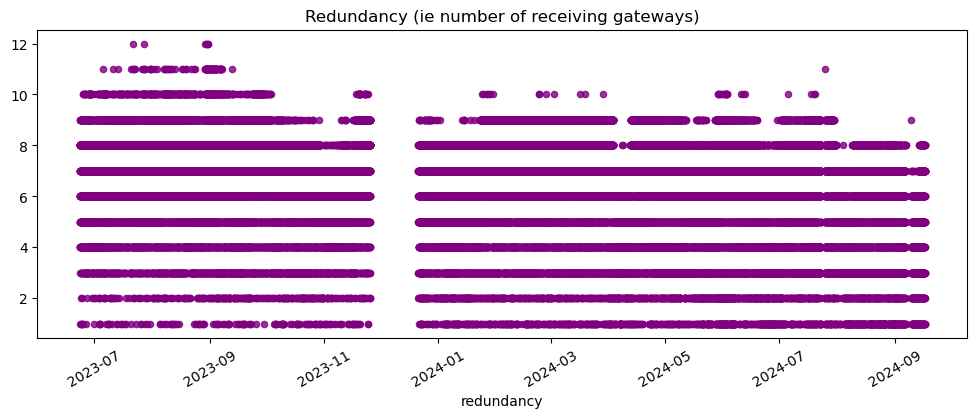

In [11]:
rx.plot(x='_dt', y='_redundancy', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='Redundancy (ie number of receiving gateways)', xlabel='redundancy', ylabel='', fontsize=10, figsize=(12,4));
plt.show()

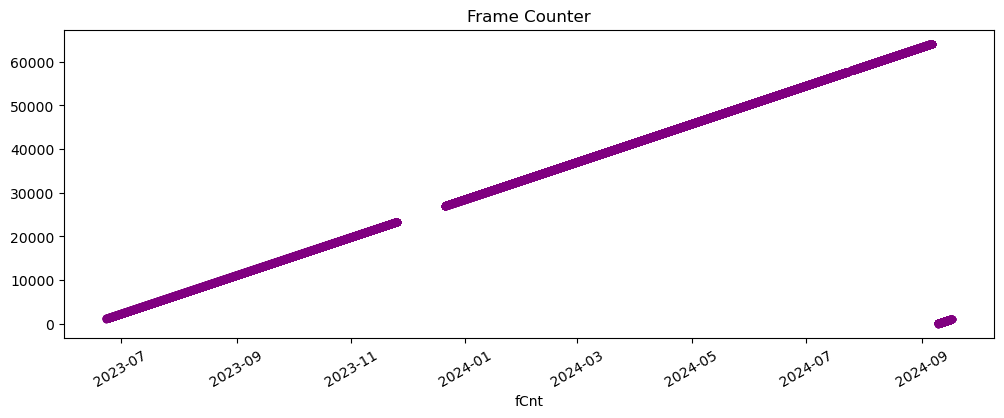

In [12]:
rx.plot(x='_dt', y='fCnt', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='Frame Counter', xlabel='fCnt', ylabel='', fontsize=10, figsize=(12,4));
plt.show()

## TODO
* [ ] compute PER
* [ ] flatten rxInfo
* [ ] normalize txInfo
* [ ] plot distribution of frequencies
* [ ] plot distribution of dr (datarate)

In [13]:
### WIP
rxInfo = pd.json_normalize(rx['rxInfo'])

In [14]:
rxInfo

,0,1,2,3,4,5,6,7,8,9,10,11
0,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,None,None,None,None,None
1,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,None,None,None,None
2,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,None,None,None,None
3,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,None,None,None,None
4,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
59053,{'gatewayID': '17459c667f0f9d699c72661d970f462...,None,None,None,None,None,None,None,None,None,None,None
59054,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,None,None,None,None,None,None
59055,{'gatewayID': '17459c667f0f9d699c72661d970f462...,None,None,None,None,None,None,None,None,None,None,None
59056,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,None,None,None,None,None


#  Payload
> Since the payload decoder has changed during the experiment, some columns (pressure, temperature, light) should be merged (or removed)


In [15]:
payload = rx[['deviceName', 'devEUI', '_dt', '_timestamp', '_date','object']]

obj = pd.json_normalize(payload['object'])
obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59058 entries, 0 to 59057
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data.battery.data         5 non-null      float64
 1   data.dlId.data            30 non-null     float64
 2   data.light.data           5 non-null      float64
 3   data.payloadVersion.data  30 non-null     float64
 4   data.pressure.data        29 non-null     float64
 5   data.temperature.data     29 non-null     float64
 6   data.willListen.data      30 non-null     object 
 7   battery                   9907 non-null   float64
 8   light                     6747 non-null   float64
 9   payloadVersion            59028 non-null  float64
 10  pressure                  54940 non-null  float64
 11  temperature               54928 non-null  float64
 12  willListen                59026 non-null  object 
 13  uptime                    1 non-null      object 
 14  lastAs

In [16]:
payload = payload.join(obj).drop(columns='object')
payload = payload[['deviceName', 'devEUI', '_dt', '_timestamp', '_date',\
                  'battery','light','pressure','temperature'  ]]
payload

,deviceName,devEUI,_dt,_timestamp,_date,battery,light,pressure,temperature
0,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 10:01:57.004,1687514517004,2023-06-23T10:01:57.004Z,NaN,NaN,NaN,NaN
1,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 10:11:59.135,1687515119135,2023-06-23T10:11:59.135Z,NaN,NaN,NaN,NaN
2,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 10:22:03.213,1687515723213,2023-06-23T10:22:03.213Z,NaN,NaN,NaN,NaN
3,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 10:32:13.229,1687516333229,2023-06-23T10:32:13.229Z,NaN,NaN,NaN,NaN
4,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2023-06-23 10:42:17.040,1687516937040,2023-06-23T10:42:17.040Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59489,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2024-09-16 22:16:14.107,1726524974107,2024-09-16T22:16:14.107Z,NaN,NaN,NaN,NaN
59490,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2024-09-16 22:26:27.128,1726525587128,2024-09-16T22:26:27.128Z,NaN,NaN,NaN,NaN
59491,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2024-09-16 22:36:40.109,1726526200109,2024-09-16T22:36:40.109Z,NaN,NaN,NaN,NaN
59492,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,2024-09-16 22:46:53.094,1726526813094,2024-09-16T22:46:53.094Z,NaN,NaN,NaN,NaN


In [17]:
payload.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59058 entries, 0 to 59493
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deviceName   59058 non-null  object        
 1   devEUI       59058 non-null  object        
 2   _dt          59058 non-null  datetime64[ns]
 3   _timestamp   59058 non-null  int64         
 4   _date        59058 non-null  object        
 5   battery      9829 non-null   float64       
 6   light        6687 non-null   float64       
 7   pressure     54523 non-null  float64       
 8   temperature  54511 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 6.5+ MB


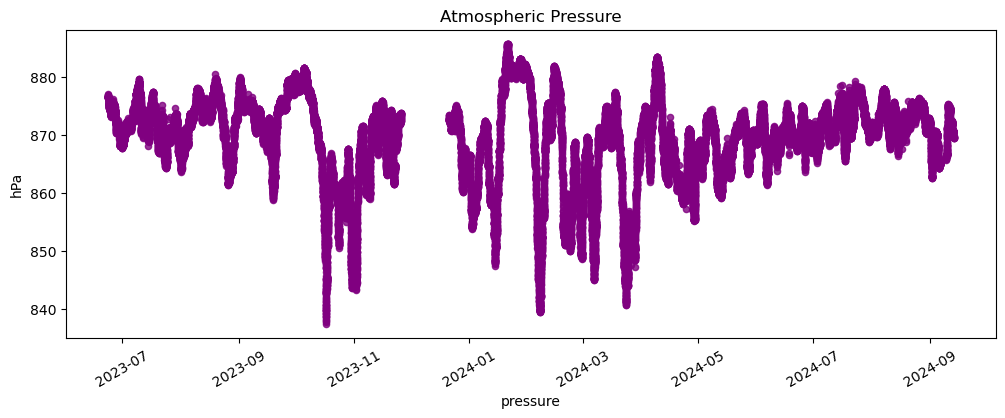

In [18]:
payload.plot(x='_dt', y='pressure', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='Atmospheric Pressure', xlabel='pressure', ylabel='hPa', fontsize=10, figsize=(12,4));
plt.show()

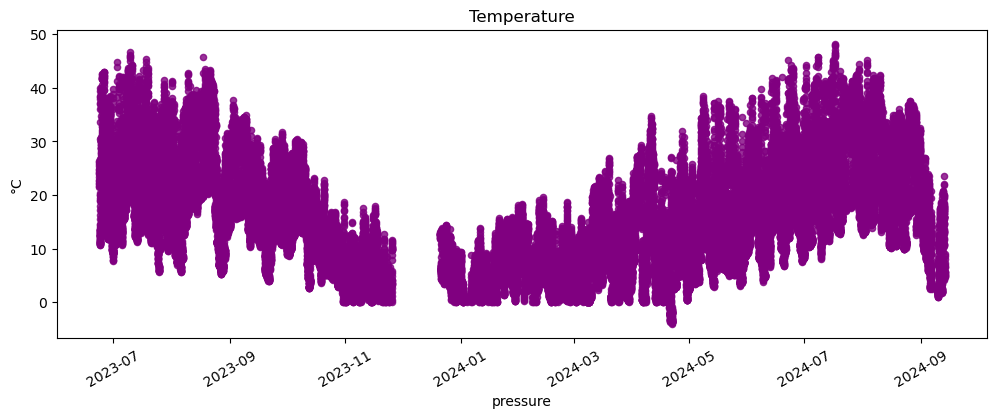

In [19]:
payloadT = payload[payload.temperature < 100].reset_index()
payloadT.plot(x='_dt', y='temperature', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='Temperature', xlabel='pressure', ylabel='°C', fontsize=10, figsize=(12,4));
plt.show()

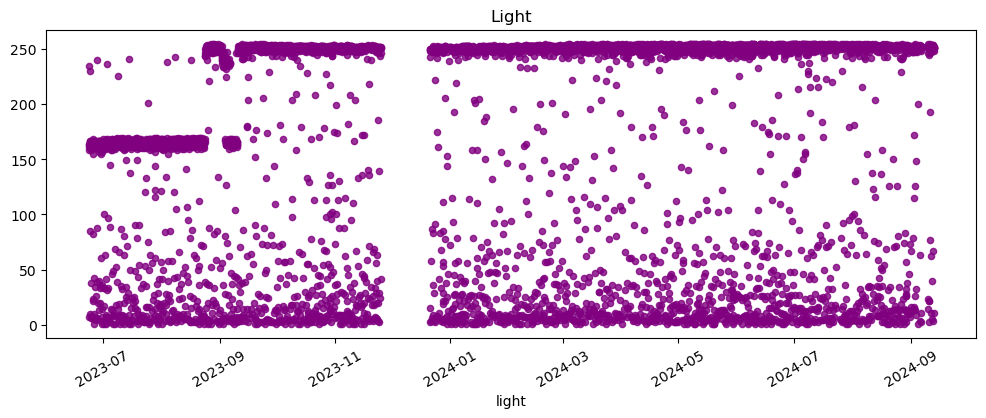

In [20]:
payload.plot(x='_dt', y='light', kind='scatter', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='Light', xlabel='light', ylabel='', fontsize=10, figsize=(12,4));
plt.show()